In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_values = pd.read_csv('train_values.csv')

In [3]:
df_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_labels = pd.read_csv('train_labels.csv')

In [5]:
df_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [6]:
df = pd.merge(df_labels, df_values, left_on = 'building_id', right_on = 'building_id')

In [7]:
df.damage_grade

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

# Data Wrangling

In [8]:
## Make sure location id numbers are read in as strings
df[['geo_level_1_id','geo_level_2_id','geo_level_3_id']] = \
df[['geo_level_1_id','geo_level_2_id','geo_level_3_id']].astype(str)

In [9]:
y = df.damage_grade
X = df.drop(['building_id','damage_grade', 'geo_level_2_id', 'geo_level_3_id'], axis =1)

X_cat = df.drop(['building_id','damage_grade'], axis=1)

X = pd.get_dummies(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size=0.35, random_state=42)

In [11]:
X_test_cat

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
111801,10,1224,11128,1,20,7,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0
91817,22,1101,12483,2,60,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
251661,26,39,11440,2,50,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
205479,8,1073,2743,3,50,7,6,o,r,q,...,0,0,0,0,0,0,0,0,0,0
22618,6,706,7959,2,15,8,4,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201420,9,230,1781,1,15,11,3,t,r,n,...,0,0,0,0,0,0,0,0,0,0
77434,26,1001,12258,2,0,4,5,t,w,n,...,1,0,0,0,0,0,0,0,0,0
219756,7,545,10208,3,20,5,6,t,r,q,...,0,0,0,0,0,0,0,0,0,0
257451,10,1140,4624,3,25,11,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169390 entries, 85190 to 121958
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          169390 non-null  object
 1   geo_level_2_id                          169390 non-null  object
 2   geo_level_3_id                          169390 non-null  object
 3   count_floors_pre_eq                     169390 non-null  int64 
 4   age                                     169390 non-null  int64 
 5   area_percentage                         169390 non-null  int64 
 6   height_percentage                       169390 non-null  int64 
 7   land_surface_condition                  169390 non-null  object
 8   foundation_type                         169390 non-null  object
 9   roof_type                               169390 non-null  object
 10  ground_floor_type                       169390 non-n

# Exploratory Analysis

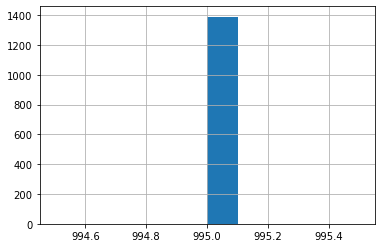

In [7]:
mask = (df['age']>500)

df.age[mask].hist()

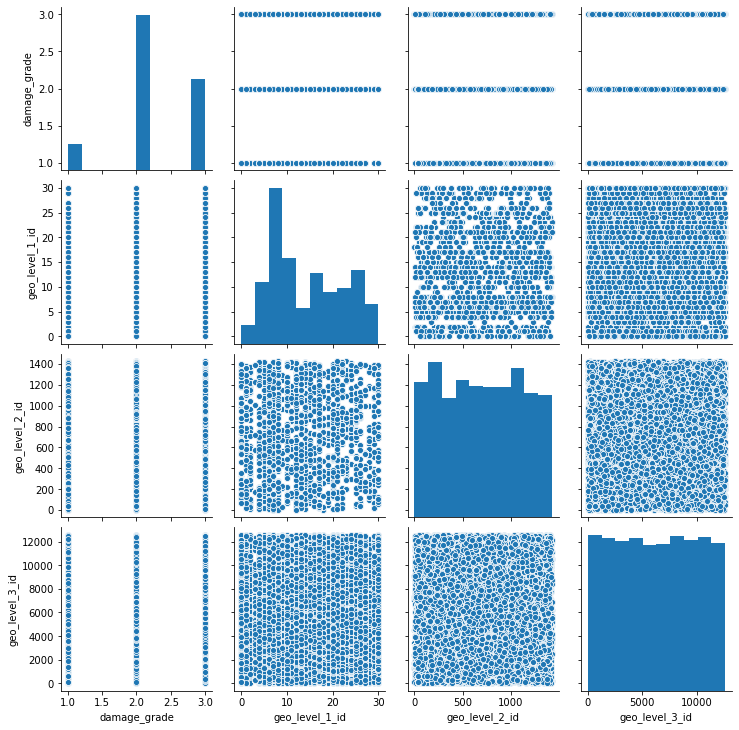

In [25]:
import seaborn as sns

geo_level = df[['damage_grade','geo_level_1_id','geo_level_2_id','geo_level_3_id']]

sns.pairplot(geo_level)

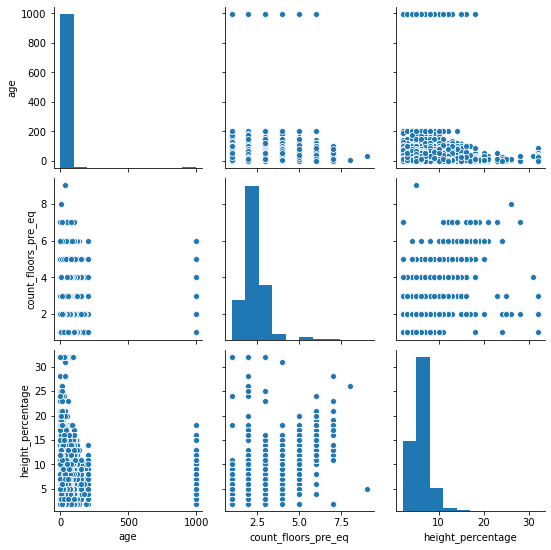

In [27]:
building_spec = df[['age','count_floors_pre_eq','height_percentage', 'foundation_type','roof_type']]

sns.pairplot(building_spec)

# Fitting Models

In [ ]:
## Finding best parameters for CatBoost

from sklearn.model_selection import GridSearchCV

train_dataset = Pool(data=X_train_cat,
                     label=y_train_cat,
                     cat_features=cat_features)
eval_dataset = Pool(data=X_test_cat,
                    label=y_test_cat,
                    cat_features=cat_features)
model_search = CatBoostClassifier(loss_function='MultiClass')
grid = {
        'l2_leaf_reg' : [1,3,6,9]
        'learning_rate' : [.06,.07,.08]
        'depth' : [7,8,9]
        'iterations' : [700,800,900]
       }
grid_search_result = model_search.grid_search(grid, train_dataset,
                                       cv=5,
                                       plot=True)

In [14]:
## CatBoost Model

import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

# initialize data
cat_features = [0,1,2,7,8,9,10,11,12,13,25]

train_dataset = Pool(data=X_train_cat,
                     label=y_train_cat,
                     cat_features=cat_features)

eval_dataset = Pool(data=X_test_cat,
                    label=y_test_cat,
                    cat_features=cat_features)

model_actual = CatBoostClassifier(iterations=1000,
                           depth=8,
                           learning_rate=0.09,
                           od_pval = 10**(-4),
                           loss_function='MultiClass',
                           verbose=True,
                           eval_metric= 'TotalF1')
# train the model
model_actual.fit(train_dataset)

# make the prediction using the resulting model
preds_class = model_actual.predict(eval_dataset)

preds_proba = model_actual.predict_proba(eval_dataset)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']

print(classification_report(y_test, preds_class, target_names=target_names))

0:	learn: 0.6879467	total: 1.23s	remaining: 11s
1:	learn: 0.6889261	total: 2.57s	remaining: 10.3s
2:	learn: 0.6897551	total: 5.15s	remaining: 12s
3:	learn: 0.6895127	total: 6.15s	remaining: 9.22s
4:	learn: 0.6909739	total: 7.43s	remaining: 7.43s
5:	learn: 0.6898468	total: 8.42s	remaining: 5.61s
6:	learn: 0.6904156	total: 9.92s	remaining: 4.25s
7:	learn: 0.6910887	total: 11.1s	remaining: 2.77s
8:	learn: 0.6905767	total: 12s	remaining: 1.34s
9:	learn: 0.6912029	total: 13s	remaining: 0us
                precision    recall  f1-score   support

damage_grade 1       0.64      0.32      0.43      8814
damage_grade 2       0.70      0.85      0.77     51896
damage_grade 3       0.73      0.58      0.64     30501

      accuracy                           0.71     91211
     macro avg       0.69      0.58      0.61     91211
  weighted avg       0.71      0.71      0.69     91211



In [151]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42, min_samples_split=100)
#clf_rf.fit(X_train_s, y_train)
#clf_pred = clf_rf.predict(X_test_s)

calibrator = CalibratedClassifierCV(clf_rf, cv=5)
calibrator.fit(X_train_fa, y_train)
# evaluate the model
yhat = calibrator.predict(X_test_fa)

target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, yhat, target_names=target_names))

                precision    recall  f1-score   support

damage_grade 1       0.64      0.40      0.49      8814
damage_grade 2       0.70      0.83      0.76     51896
damage_grade 3       0.71      0.55      0.62     30501

      accuracy                           0.70     91211
     macro avg       0.68      0.59      0.62     91211
  weighted avg       0.69      0.70      0.69     91211



In [29]:
## Logistic Regression Model

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [37]:
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(X_scaled_train,y_train)

LogisticRegression(max_iter=5000)

In [38]:
pred = logreg.predict(X_scaled_test)
target_names = ['damage_grade 1', 'damage_grade 2', 'damage_grade 3']
print(classification_report(y_test, pred, target_names=target_names))

                precision    recall  f1-score   support

damage_grade 1       0.59      0.29      0.39      6347
damage_grade 2       0.60      0.84      0.70     36994
damage_grade 3       0.53      0.25      0.34     21810

      accuracy                           0.59     65151
     macro avg       0.57      0.46      0.48     65151
  weighted avg       0.58      0.59      0.55     65151



## Predicting the Competition Data

In [ ]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')

In [ ]:
predictions = model_actual.predict(test_values)

In [ ]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.to_csv('submission10.csv')

!head submission10.csv